**Name : Moumita Roy**

Problem statement

Bigmart aims to use predictive modeling to understand and predict sales in its stores. The company has compiled sales data for 1,559 products across 10 stores in different cities for 2013. The list includes products and store-by-store inventory but some stores have value in the data due to technical fault, which needs to be corrected.

Hypothesis Generation

Effect of Store Location: The location of the Store can have a significant impact on sales. Consider that stores in certain cities or areas may have higher sales due to factors such as demographics, economic conditions, and local preferences

Product Visibility: Greater display or better shelf placement can drive sales. Suppose a product’s in-store visibility is positively correlated with sales.

Product characteristics: Characteristics of a product, such as size, weight, or brand name, can affect sales. Assume that products with a particular quality tend to have higher sales volumes.

Price perception: Consumer buying behavior can influence prices. Suppose that cheaper items or items that are often discounted sell more, indicating that the customer is more expensive.

Store Size and Layout: Larger stores can have a variety of offerings, which can result in higher sales. Imagine that store size and layout play a role in sales.

Promotional Activities: Products that include promotions, discounts, or special offers may see an increase in sales. Assume that promotional strategies have a positive effect on sales.

Day-of-Week Effects: Certain days of the week may witness higher footfall or purchasing activity. Hypothesize that there are day-of-week effects on product sales, with certain days exhibiting higher sales volumes.

Seasonal: Sales may vary in seasons or months. There are seasonal patterns in sales, and take into consideration whether certain products work best at certain times of the year.

Loss of data impact: Loss of variance in a data set can be due to technical errors. Assume that missing data is not random and may be affected by specific factors such as store size or location.

Customer Demographics: The demographic characteristics of the people near the store can affect sales. Imagine understanding local demographics, which can give us insight into sales patterns.

Customer Behavior Changes Over Time: Customer preferences and behaviors may change over time. Hypothesize that there are temporal trends in sales patterns, and the model should account for these changes to make accurate predictions.

Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
!unzip "/content/drive/MyDrive/9961_14084_bundle_archive.zip"

Archive:  /content/drive/MyDrive/9961_14084_bundle_archive.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [3]:
test=pd.read_csv("/content/Test.csv")
train=pd.read_csv("/content/Train.csv")

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Item_Weight: The average item weight is 12.86, with a standard deviation of 4.64. Most items weigh between 8.77 and 16.85 units, but there are a few outliers as heavy as 21.35 units.
#Item_Visibility: The average item visibility score is 0.0661, with a standard deviation of 0.0516. Most items have visibility scores between 0.0270 and 0.0946, but there are a few outliers with scores as high as 0.3284.
#Item_MRP: The average item maximum retail price (MRP) is 140.99, with a standard deviation of 62.28. Most items have MRPs between 93.83 and 185.64, but there are a few outliers with prices as high as 266.89.
#Outlet_Establishment_Year: The average outlet establishment year is 1997.83, with a standard deviation of 8.37. Most outlets were established between 1987 and 2004, but there are a few outliers from as early as 1985 and as late as 2009.
#Item_Outlet_Sales: The average item outlet sales is 2181.29, with a standard deviation of 1706.50. Most items have sales between 834.25 and 3101.30, but there are a few outliers with sales as high as 13086.96.

THE UNIQUE VALUES IN THE EACH COLUMNS

In [11]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in Item_Weight: [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12. 

checking missing values

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

missing values are present in Item_Weight and Outlet_Size

In [14]:
# handling missing values using mean of the column
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [15]:
# For Outlet_Size,replacing  missing values with a placeholder 'Unknown'
train['Outlet_Size'].fillna('Unknown', inplace=True)
test['Outlet_Size'].fillna('Unknown', inplace=True)


In [16]:
train.isnull().sum()
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Convert Categorical Variables

In [17]:
# Convert categorical variables to numerical using one-hot encoding
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
test = pd.get_dummies(test, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)


Normalize Numerical Features

In [18]:
from sklearn.preprocessing import StandardScaler
#Normalize numerical features
scaler = StandardScaler()
train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = scaler.fit_transform(train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])
test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = scaler.transform(test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,-0.841872,-0.970732,1.747454,0.139541,3735.1380,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,DRC01,-1.641706,-0.908111,-1.489023,1.334103,443.4228,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,FDN15,1.098554,-0.956917,0.010040,0.139541,2097.2700,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,FDX07,1.500838,-1.281758,0.660050,0.020085,732.3800,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,NCD19,-0.929428,-1.281758,-1.399220,-1.293934,994.7052,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [20]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,1.867626,-1.135138,-0.532035,0.139541,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,FDW14,-1.078509,-0.536960,-0.861920,1.095190,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,NCN55,0.412306,0.648183,1.618094,0.020085,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,FDQ58,-1.311597,-0.983503,0.225484,1.095190,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,FDY38,-0.038338,1.016910,1.497272,-1.532846,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


Hypothesis testing

1. Impact of Outlet Type on Sales

In [21]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_Unkno

In [22]:
from scipy.stats import f_oneway

# H0: The type of outlet has no significant impact on sales
# H1: Different outlet types result in significantly different sales

# Create a new column 'Total_Sales' by summing sales across all outlet types
train['Total_Sales'] = train[['Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']].sum(axis=1)

# Check the counts of data points for each outlet type
for outlet_type in ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']:
    count = train[train['Outlet_Type_' + outlet_type] == 1]['Item_Outlet_Sales'].count()
    print(f"Count of data points for {outlet_type}: {count}")

# Perform one-way ANOVA only if all groups have data
if all(train['Total_Sales'].value_counts() > 0):
    statistic, p_value = f_oneway(train[train['Total_Sales'] == 0]['Item_Outlet_Sales'],
                                   train[train['Total_Sales'] == 1]['Item_Outlet_Sales'],
                                   train[train['Total_Sales'] == 2]['Item_Outlet_Sales'])

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. Different outlet types result in significantly different sales.")
    else:
        print("Fail to reject the null hypothesis.")
else:
    print("Cannot perform ANOVA. One or more outlet types have no data.")


Count of data points for Supermarket Type1: 5577
Count of data points for Supermarket Type2: 928
Count of data points for Supermarket Type3: 935
Fail to reject the null hypothesis.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


item visibility over sales

In [23]:
from scipy.stats import pearsonr

# H0: There is no correlation between item visibility and sales
# H1: There is a significant correlation between item visibility and sales

correlation, p_value = pearsonr(train['Item_Visibility'], train['Item_Outlet_Sales'])

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between item visibility and sales.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. There is a significant correlation between item visibility and sales.


the Mean Sales for Different Outlet Sizes

In [24]:
from scipy.stats import f_oneway

# H0: Outlet size has no significant impact on sales
# H1: Different outlet sizes result in significantly different mean sales

outlet_sizes = ['Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_Unknown']

statistic, p_value = f_oneway(*[train[train[outlet_size] == 1]['Item_Outlet_Sales'] for outlet_size in outlet_sizes])

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Different outlet sizes result in significantly different mean sales.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis. Different outlet sizes result in significantly different mean sales.


the Mean Sales for Different Item Types

In [25]:
from scipy.stats import f_oneway

# H0: Item type has no significant impact on sales
# H1: Different item types result in significantly different mean sales

item_types = train.columns[10:29]

statistic, p_value = f_oneway(*[train[train[item_type] == 1]['Item_Outlet_Sales'] for item_type in item_types])

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Different item types result in significantly different mean sales.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis. Different item types result in significantly different mean sales.


the Mean Sales for Low Fat and Regular Fat Content

In [26]:
from scipy.stats import ttest_ind

# H0: There is no significant difference in mean sales between Low Fat and Regular Fat content items
# H1: There is a significant difference in mean sales between Low Fat and Regular Fat content items

low_fat_sales = train[train['Item_Fat_Content_Low Fat'] == 1]['Item_Outlet_Sales']
regular_fat_sales = train[train['Item_Fat_Content_Regular'] == 1]['Item_Outlet_Sales']

statistic, p_value = ttest_ind(low_fat_sales, regular_fat_sales)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales between Low Fat and Regular Fat content items.")
else:
    print("Fail to reject the null hypothesis.")


Fail to reject the null hypothesis.


the Mean Sales for Supermarket Type1 and Supermarket Type2

In [27]:
from scipy.stats import ttest_ind

# H0: There is no significant difference in mean sales between Supermarket Type1 and Supermarket Type2
# H1: There is a significant difference in mean sales between Supermarket Type1 and Supermarket Type2

supermarket_type1_sales = train[train['Outlet_Type_Supermarket Type1'] == 1]['Item_Outlet_Sales']
supermarket_type2_sales = train[train['Outlet_Type_Supermarket Type2'] == 1]['Item_Outlet_Sales']

statistic, p_value = ttest_ind(supermarket_type1_sales, supermarket_type2_sales)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales between Supermarket Type1 and Supermarket Type2.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis. There is a significant difference in mean sales between Supermarket Type1 and Supermarket Type2.


the Proportion of Medium Sales in Different Outlet Types

In [28]:
from scipy.stats import chi2_contingency

# H0: The proportion of medium sales is the same across different outlet types
# H1: The proportion of medium sales is different across different outlet types

contingency_table = pd.crosstab(train['Outlet_Type_Supermarket Type1'], train['Outlet_Size_Medium'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The proportion of medium sales is different across different outlet types.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis. The proportion of medium sales is different across different outlet types.


EDA

In [29]:
# Display basic information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   float64
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5681 non-null   object 
 1   Item_Weight                      5681 non-null   float64
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Establishment_Year        5681 non-null   float64
 5   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 6   Item_Fat_Content_Regular         5681 non-null   uint8  
 7   Item_Fat_Content_low fat         5681 non-null   uint8  
 8   Item_Fat_Content_reg             5681 non-null   uint8  
 9   Item_Type_Breads                 5681 non-null   uint8  
 10  Item_Type_Breakfast              5681 non-null   uint8  
 11  Item_Type_Canned                 5681 non-null   uint8  
 12  Item_Type_Dairy     

In [31]:
# Display summary statistics for numerical columns
print(train.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  8.523000e+03     8.523000e+03  8.523000e+03               8.523000e+03   
mean   3.755714e-16    -1.092117e-16 -1.579818e-16               1.156560e-14   
std    1.000059e+00     1.000059e+00  1.000059e+00               1.000059e+00   
min   -1.964716e+00    -1.281758e+00 -1.761688e+00              -1.532846e+00   
25%   -8.395053e-01    -7.586531e-01 -7.574307e-01              -1.293934e+00   
50%    0.000000e+00    -2.364792e-01  3.243893e-02               1.395408e-01   
75%    7.435985e-01     5.514755e-01  7.170372e-01               7.368218e-01   
max    2.009608e+00     5.083050e+00  2.021724e+00               1.334103e+00   

       Item_Outlet_Sales  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
count        8523.000000               8523.000000               8523.000000   
mean         2181.288914                  0.597090                  0.338965   
std          1706.499616      

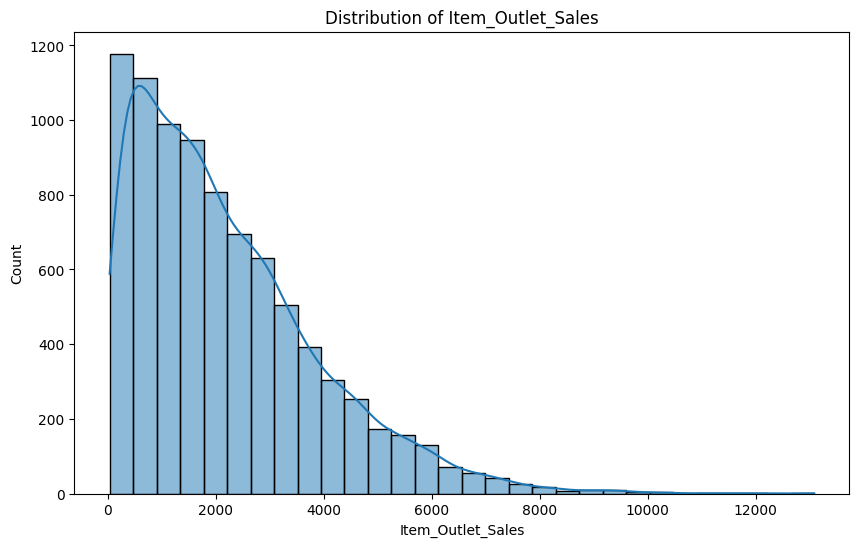

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

<ipython-input-33-e69419e8405f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


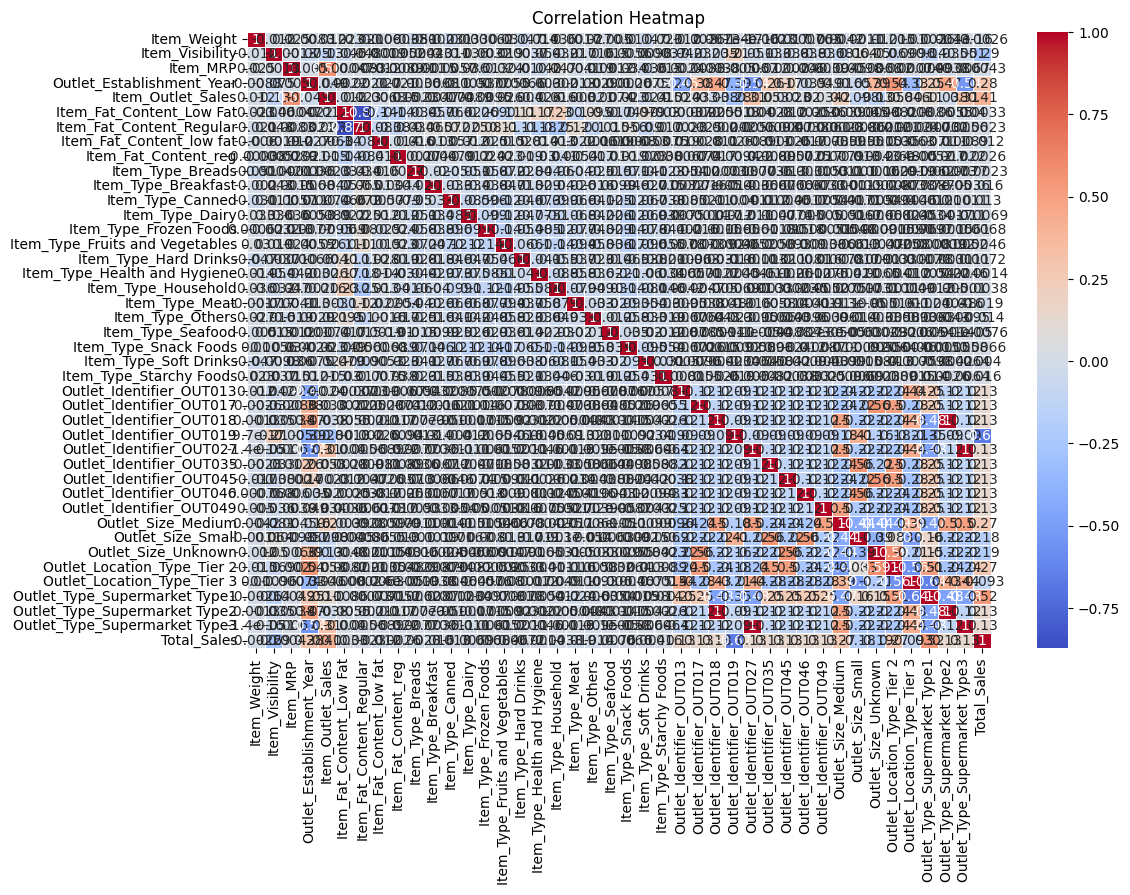

In [33]:
# Correlation heatmap
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

to find outliers

In [34]:
# Calculate IQR for numerical columns
# Define numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
Q1 = train[numerical_columns].quantile(0.25)
Q3 = train[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((train[numerical_columns] < (Q1 - 1.5 * IQR)) | (train[numerical_columns] > (Q3 + 1.5 * IQR)))

# Identify columns with outliers
columns_with_outliers = numerical_columns[outliers.any(axis=0)]

print("Columns with potential outliers:", columns_with_outliers)


Columns with potential outliers: Index(['Item_Visibility', 'Item_Outlet_Sales', 'Total_Sales'], dtype='object')


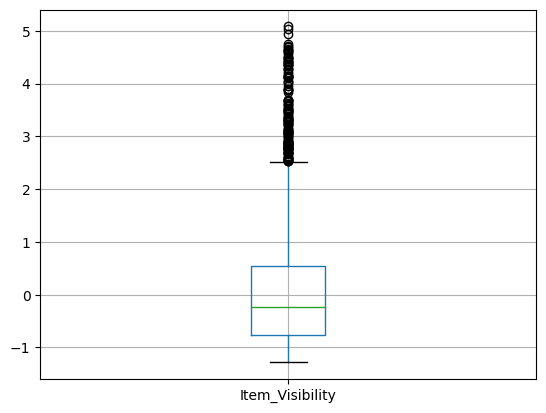

In [35]:
# Boxplot for Outlet_Type
train.boxplot(column=["Item_Visibility"])
plt.show()

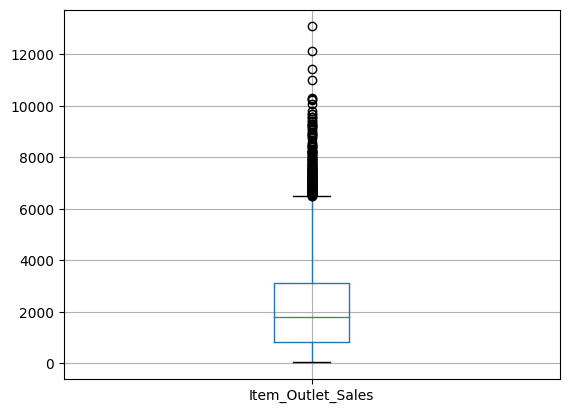

In [36]:
train.boxplot(column=["Item_Outlet_Sales"])
plt.show()

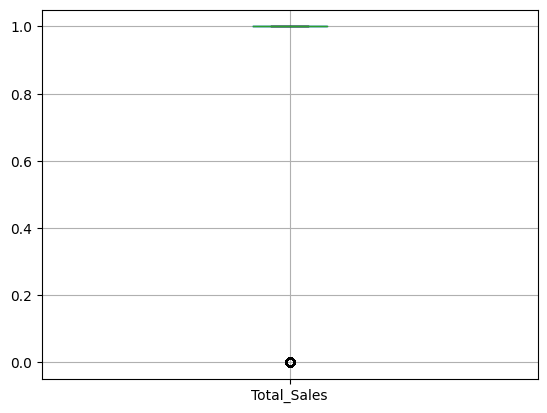

In [37]:
train.boxplot(column=["Total_Sales"])
plt.show()

for removing outliers

In [38]:
def remove_outliers(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5 * IQR)
  upper_range=Q3+(1.5 * IQR)
  return lower_range,upper_range

In [39]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
# Calculate IQR for numerical columns
Q1 = train[numerical_columns].quantile(0.25)
Q3 = train[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Print IQR for inspection
print("IQR:")
print(IQR)

# Identify outliers using IQR
outliers = ((train[numerical_columns] < (Q1 - 1.5 * IQR)) | (train[numerical_columns] > (Q3 + 1.5 * IQR)))

# Print the first few rows of outliers for inspection
print("\nOutliers:")
print(outliers.head())

# Remove outliers
train_no_outliers = train[~outliers.any(axis=1)]



IQR:
Item_Weight                     1.583104
Item_Visibility                 1.310129
Item_MRP                        1.474468
Outlet_Establishment_Year       2.030755
Item_Outlet_Sales            2267.049000
Total_Sales                     0.000000
dtype: float64

Outliers:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        False            False     False                      False   
1        False            False     False                      False   
2        False            False     False                      False   
3        False            False     False                      False   
4        False            False     False                      False   

   Item_Outlet_Sales  Total_Sales  
0              False        False  
1              False        False  
2              False        False  
3              False         True  
4              False        False  


In [40]:
# Extract numerical and categorical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train.select_dtypes(include=['object', 'uint8']).columns

# Display the lists of numerical and categorical columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Total_Sales'],
      dtype='object')

Categorical Columns:
Index(['Item_Identifier', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Id

BIVARIATE ANALYSIS

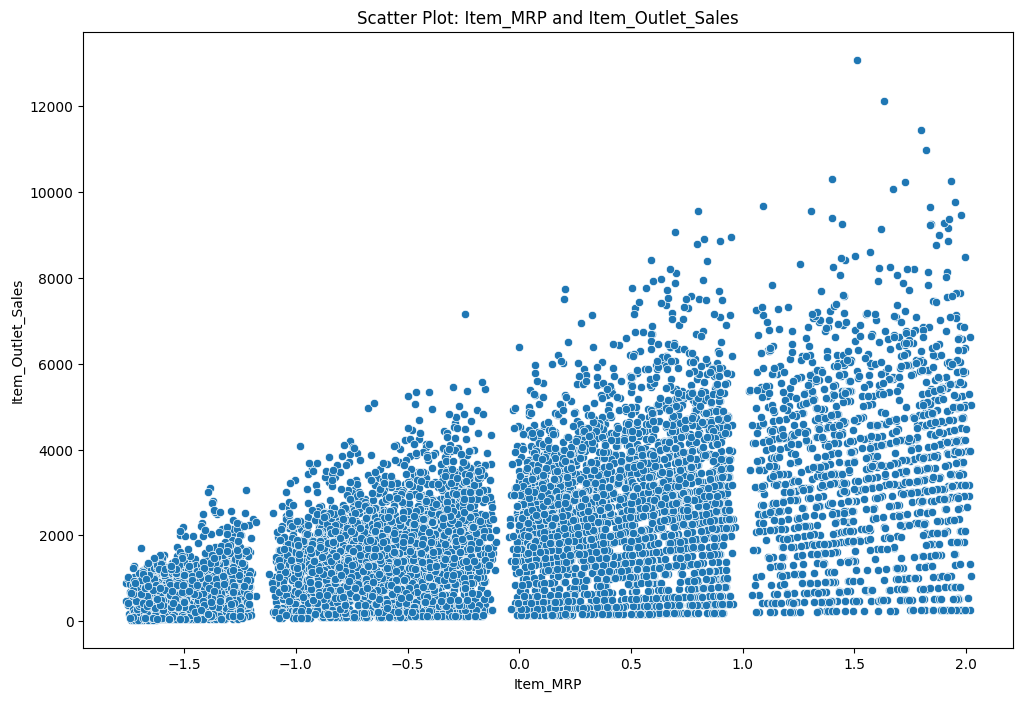

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)
plt.title('Scatter Plot: Item_MRP and Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

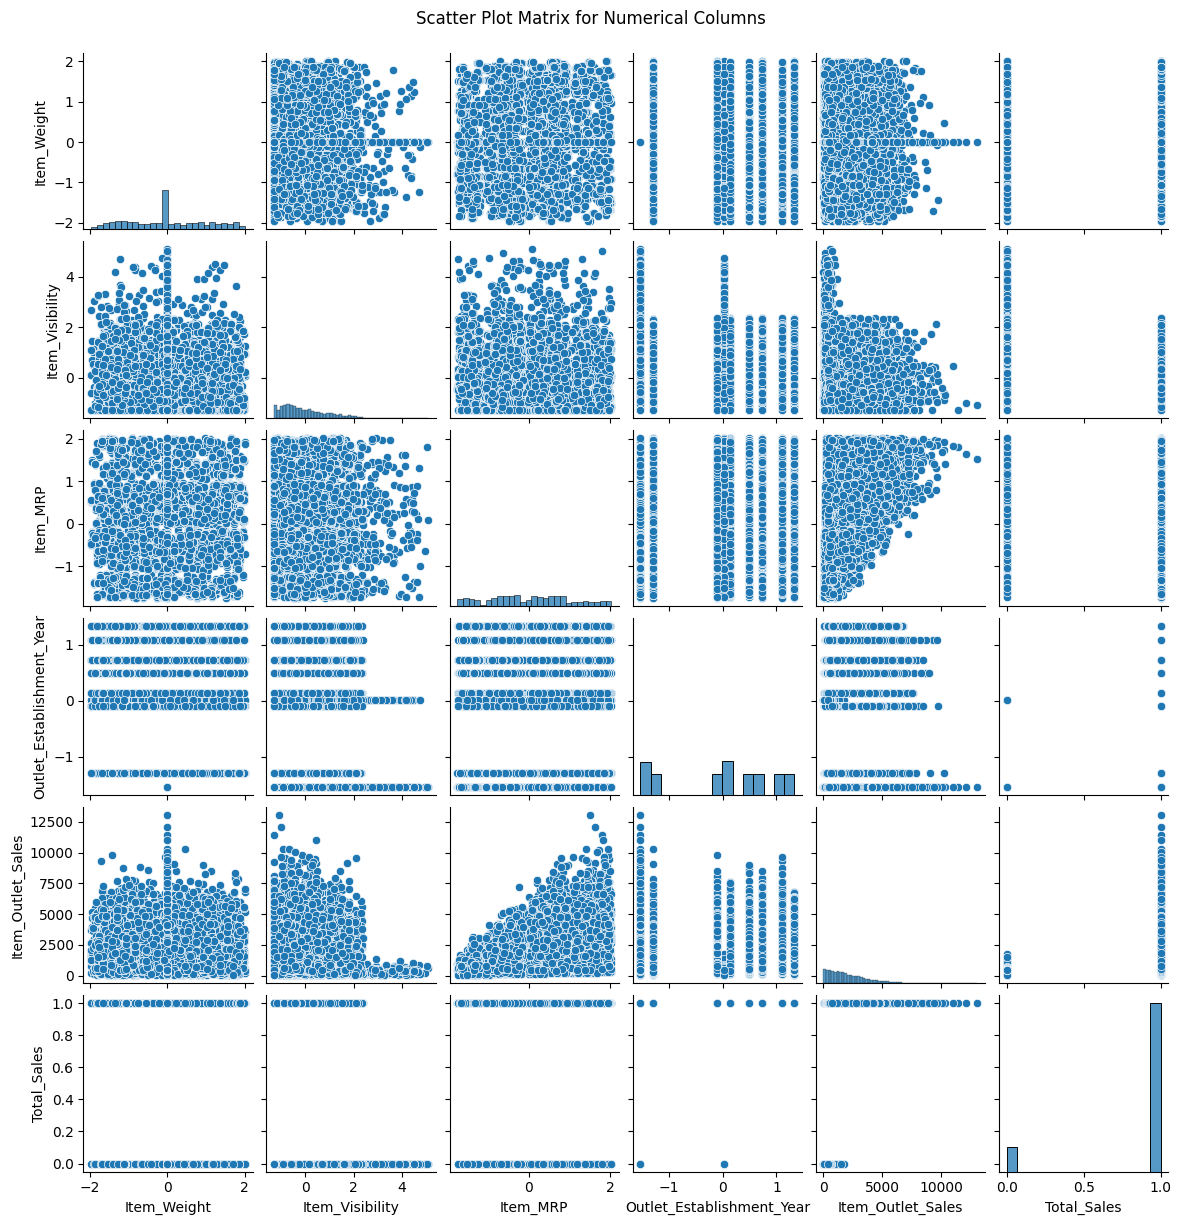

In [ ]:
# Select numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Total_Sales']

# Scatter Plot Matrix
scatter_matrix = sns.pairplot(train[numerical_columns], height=2)
plt.suptitle('Scatter Plot Matrix for Numerical Columns', y=1.02)
plt.show()

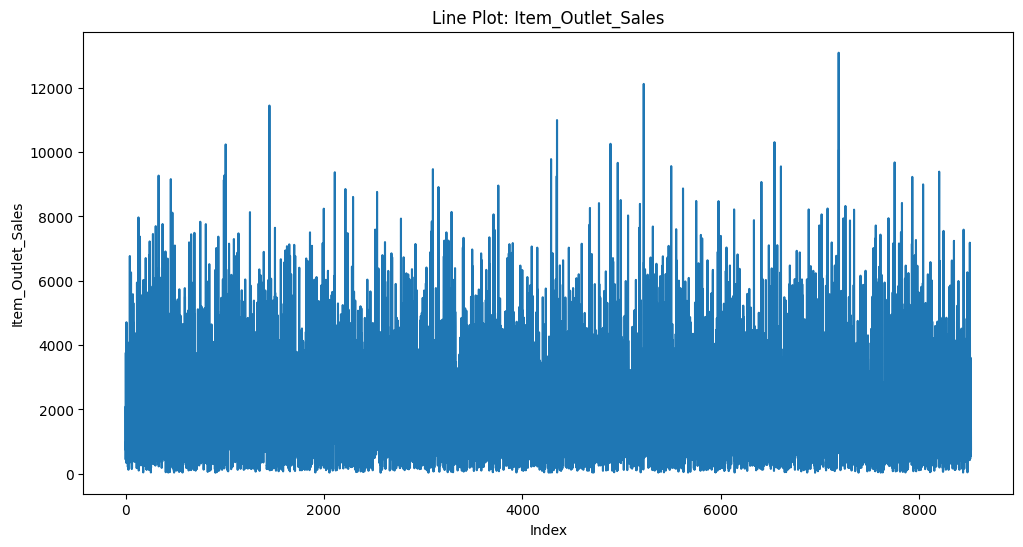

In [ ]:
# Line Plot for 'Item_Outlet_Sales'
plt.figure(figsize=(12, 6))
sns.lineplot(x=train.index, y='Item_Outlet_Sales', data=train)
plt.title('Line Plot: Item_Outlet_Sales')
plt.xlabel('Index')
plt.ylabel('Item_Outlet_Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

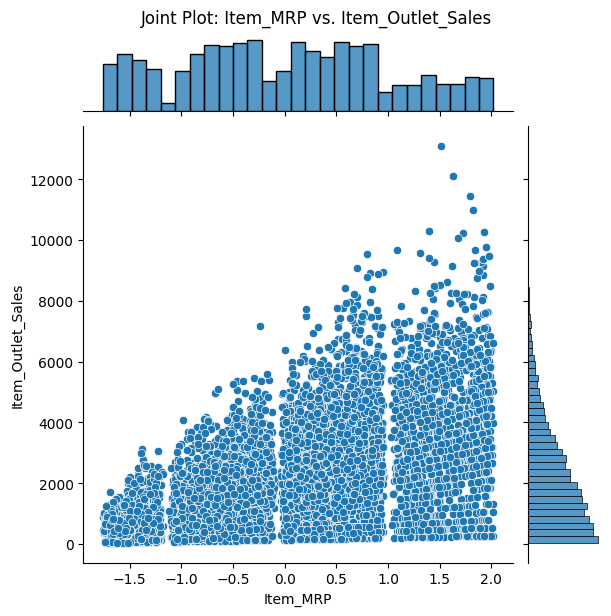

In [ ]:
# Joint Plot for 'Item_MRP' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.jointplot(x='Item_MRP', y='Item_Outlet_Sales', data=train, kind='scatter')
plt.suptitle('Joint Plot: Item_MRP vs. Item_Outlet_Sales', y=1.02)
plt.show()

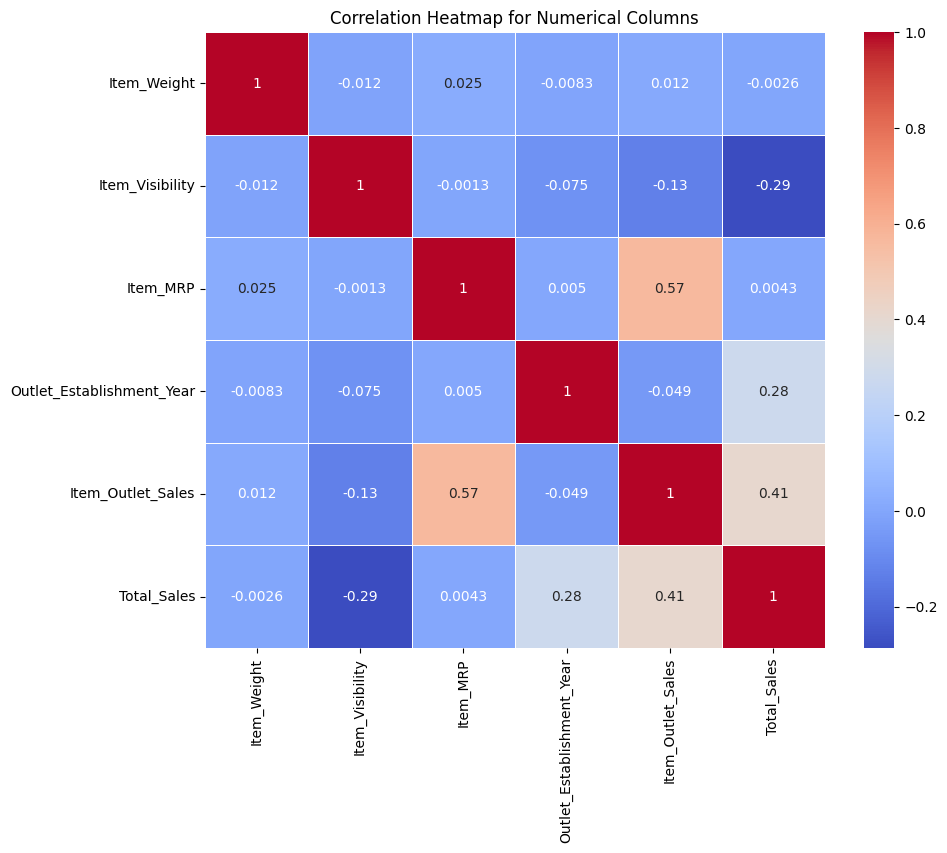

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Total_Sales']

# Create a correlation matrix
correlation_matrix = train[numerical_columns].corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


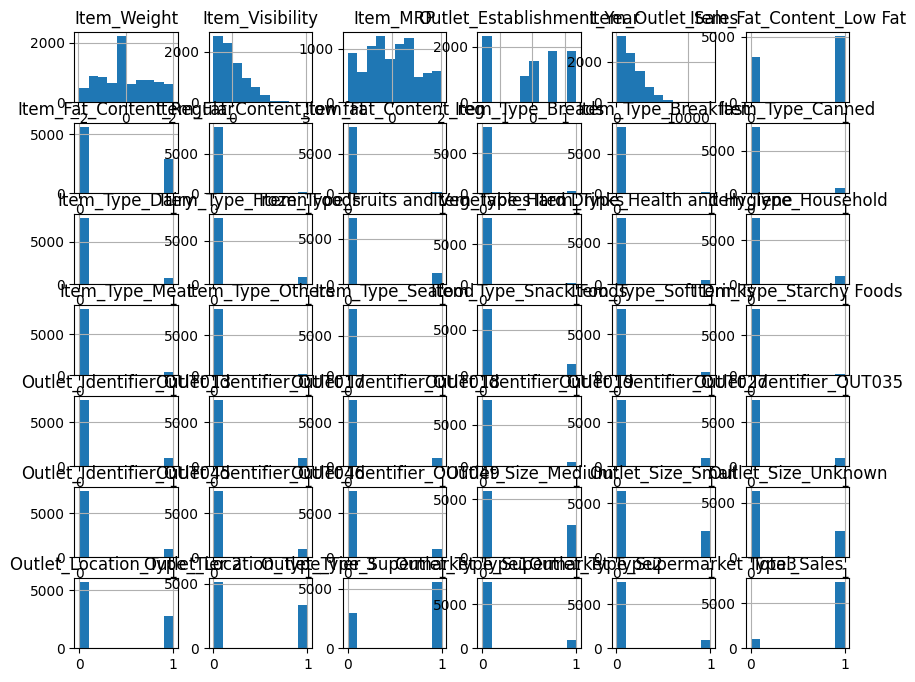

In [ ]:
# Visualize distributions and relationships
import matplotlib.pyplot as plt
train.hist(figsize=(10, 8))  # Histograms
plt.show()

In [ ]:
# Item_Weight: This graph shows the distribution of item weights. It appears to be right-skewed, with most items having weights less than 400, and a long tail extending to heavier items. There are also vertical lines at approximately 200 and 600, which may indicate categories or thresholds used to classify item weights.
#Item_Visibility: This graph shows the distribution of item visibility scores. It appears to be roughly normally distributed, with most items having visibility scores between 500 and 1500.
#Item_MRP: This graph shows the distribution of item maximum retail prices (MRPs). It also appears to be right-skewed, with most items having MRPs less than 1000, and a long tail extending to higher priced items. Similar to the weight graph, there are vertical lines at around 500 and 1250, which may indicate price categories.
#Outlet_Establishment_Year: This graph shows the distribution of the years in which the outlets were established. It appears to be left-skewed, with most outlets established before 2000, and a smaller tail extending to newer outlets.

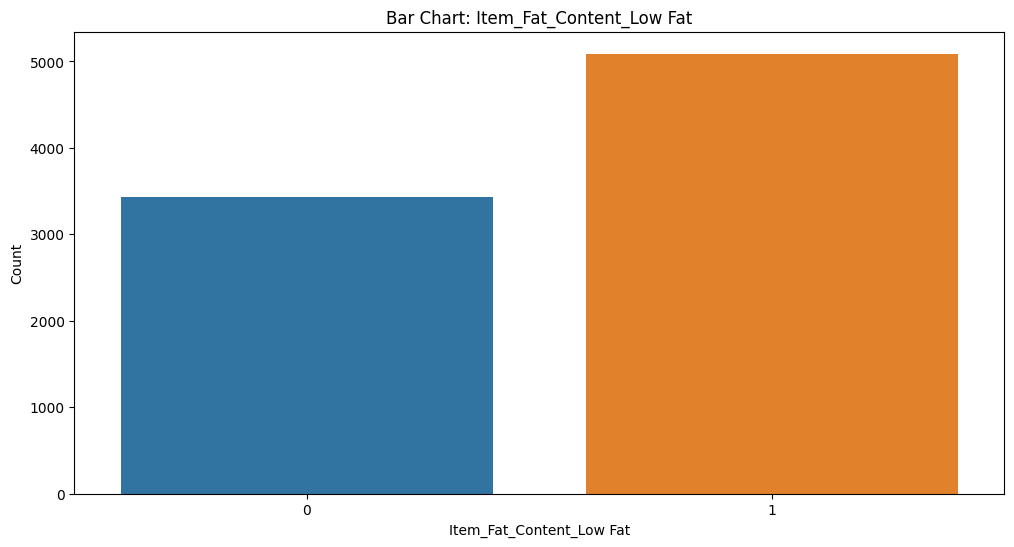

In [ ]:
# Bar chart for Item_Fat_Content_Low Fat
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Fat_Content_Low Fat', data=train)
plt.title('Bar Chart: Item_Fat_Content_Low Fat')
plt.xlabel('Item_Fat_Content_Low Fat')
plt.ylabel('Count')
plt.show()

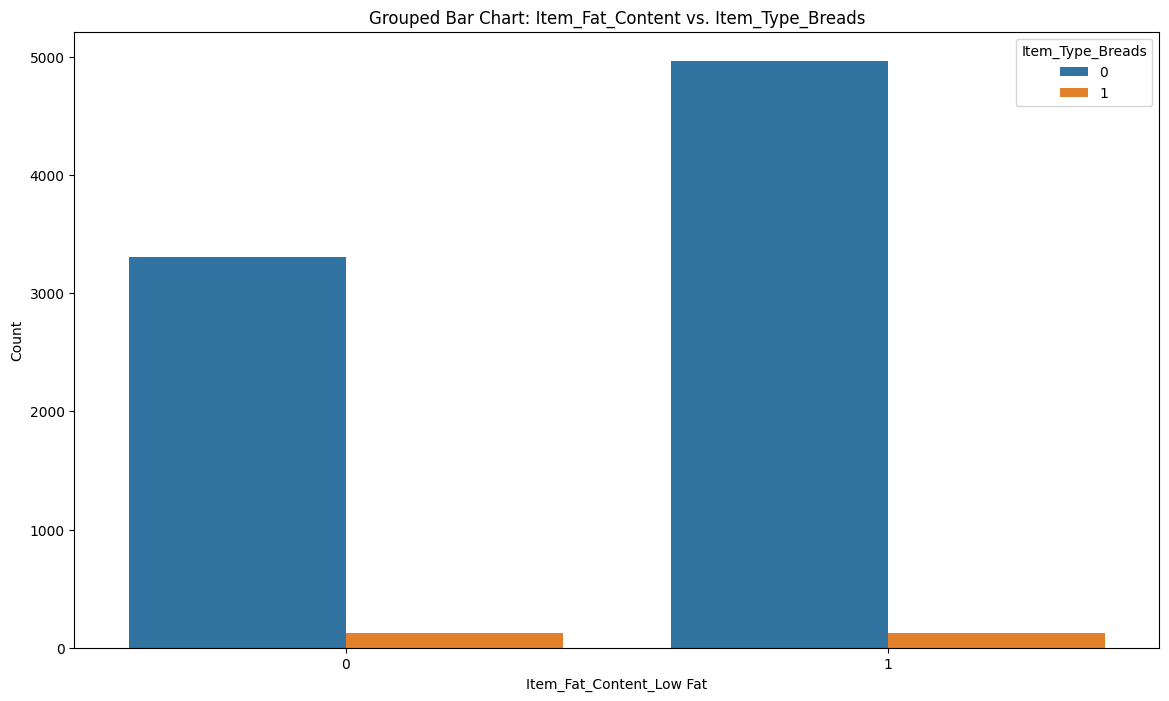

In [ ]:
# Grouped bar chart for 'Item_Fat_Content' and 'Item_Type'
plt.figure(figsize=(14, 8))
sns.countplot(x='Item_Fat_Content_Low Fat', hue='Item_Type_Breads', data=train)
plt.title('Grouped Bar Chart: Item_Fat_Content vs. Item_Type_Breads')
plt.xlabel('Item_Fat_Content_Low Fat')
plt.ylabel('Count')
plt.legend(title='Item_Type_Breads', loc='upper right')
plt.show()

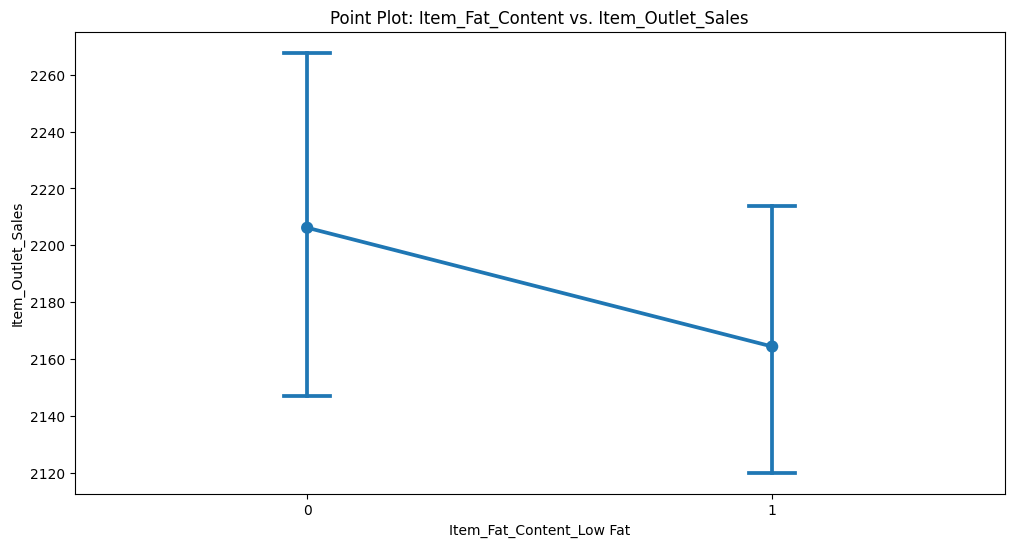

In [ ]:
# Point plot for 'Item_Fat_Content' and 'Item_Outlet_Sales'
plt.figure(figsize=(12, 6))
sns.pointplot(x='Item_Fat_Content_Low Fat', y='Item_Outlet_Sales', data=train, capsize=0.1)
plt.title('Point Plot: Item_Fat_Content vs. Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content_Low Fat')
plt.ylabel('Item_Outlet_Sales')
plt.show()

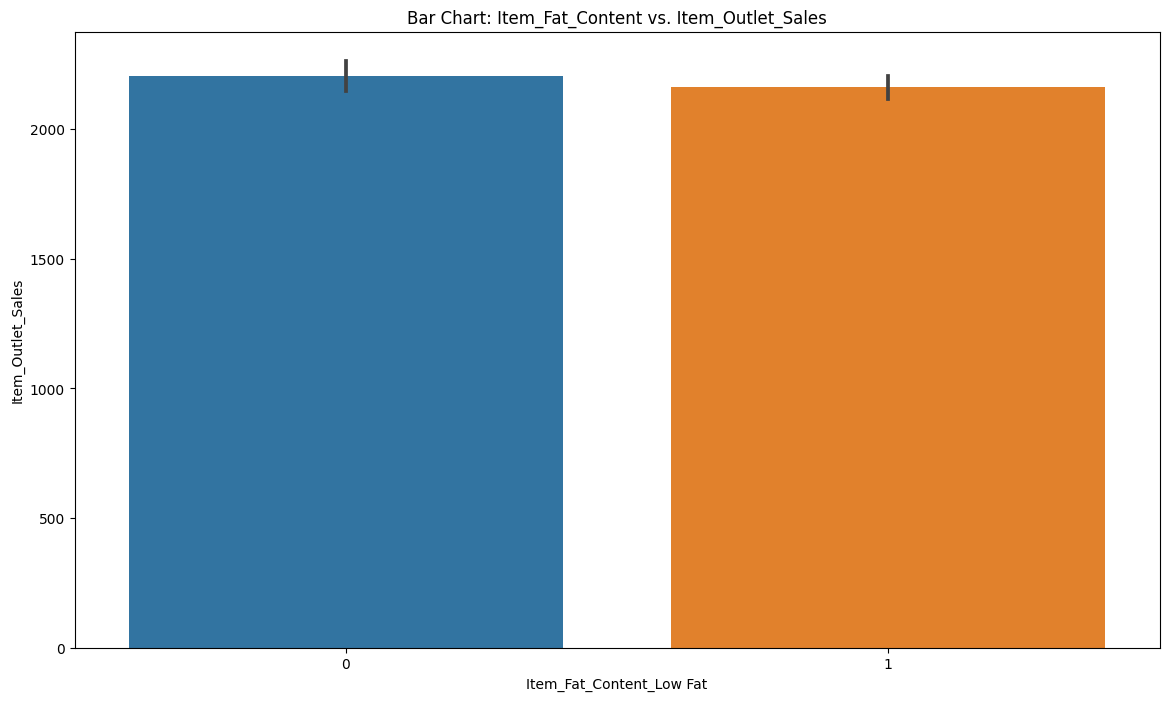

In [ ]:
# Bar chart for 'Item_Fat_Content' vs. 'Item_Outlet_Sales'
plt.figure(figsize=(14, 8))
sns.barplot(x='Item_Fat_Content_Low Fat', y='Item_Outlet_Sales', data=train)
plt.title('Bar Chart: Item_Fat_Content vs. Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content_Low Fat')
plt.ylabel('Item_Outlet_Sales')
plt.show()

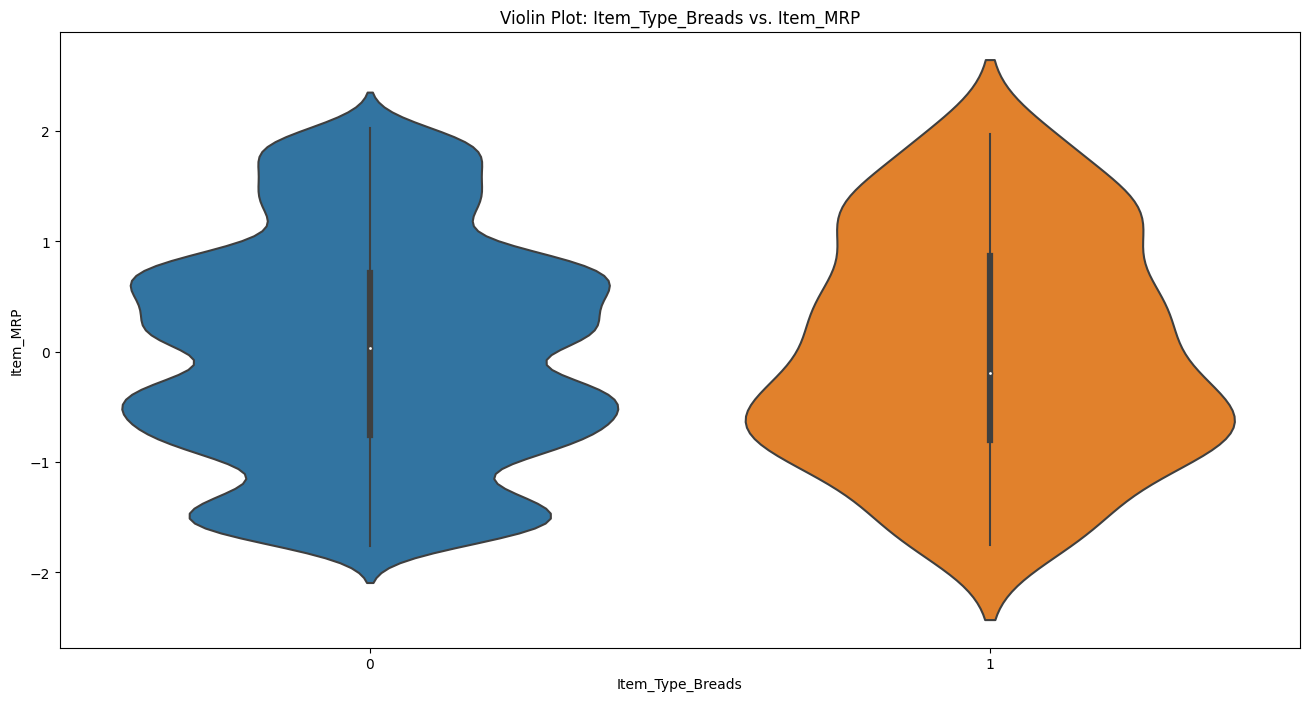

In [ ]:
# Violin plot for 'Item_Type' vs. 'Item_MRP'
plt.figure(figsize=(16, 8))
sns.violinplot(x='Item_Type_Breads', y='Item_MRP', data=train)
plt.title('Violin Plot: Item_Type_Breads vs. Item_MRP')
plt.xlabel('Item_Type_Breads')
plt.ylabel('Item_MRP')
plt.show()

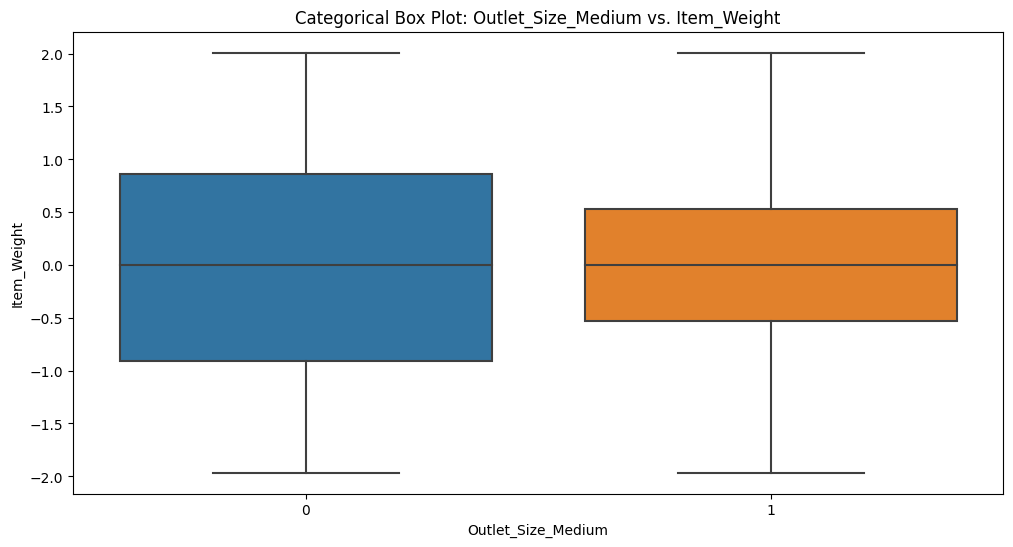

In [ ]:
# Categorical box plot for 'Outlet_Size' vs. 'Item_Weight'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Size_Medium', y='Item_Weight', data=train)
plt.title('Categorical Box Plot: Outlet_Size_Medium vs. Item_Weight')
plt.xlabel('Outlet_Size_Medium')
plt.ylabel('Item_Weight')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


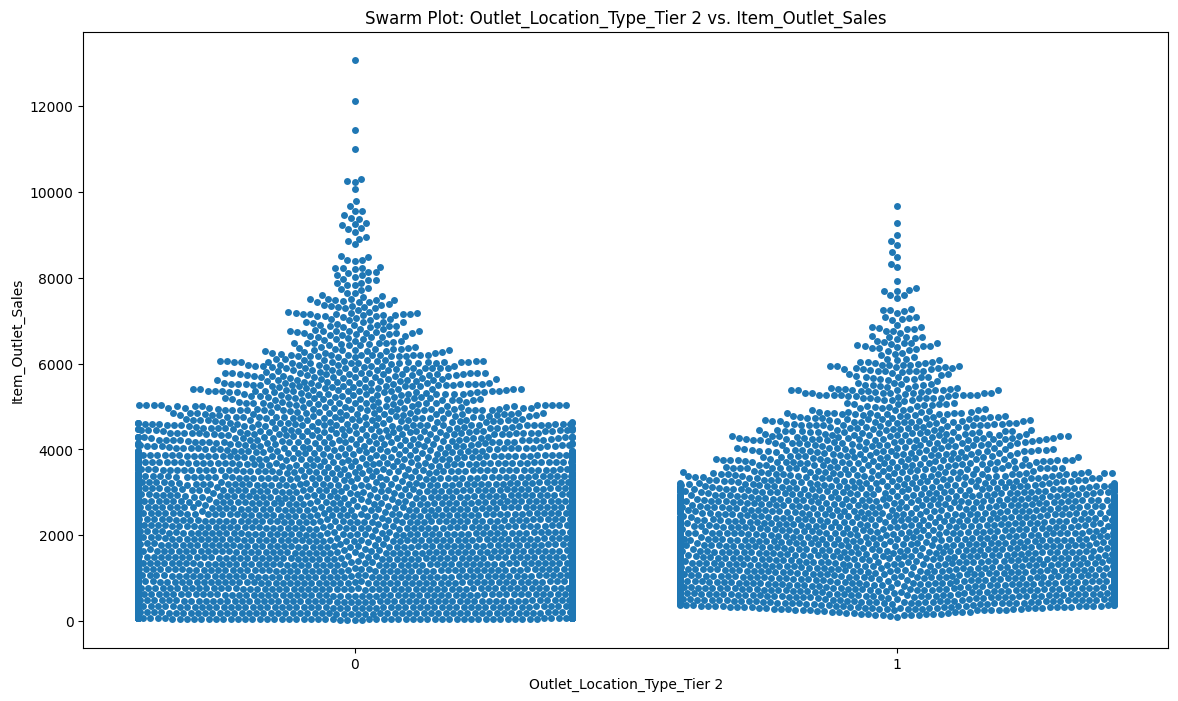

In [ ]:
# Swarm plot for 'Outlet_Location_Type' vs. 'Item_Outlet_Sales'
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Outlet_Location_Type_Tier 2', y='Item_Outlet_Sales', data=train)
plt.title('Swarm Plot: Outlet_Location_Type_Tier 2 vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Location_Type_Tier 2')
plt.ylabel('Item_Outlet_Sales')
plt.show()

MODELLING

In [ ]:
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

splitting the data

In [ ]:
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [ ]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

1. Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Use only numerical features for simplicity in this example
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Extract features and target variable
X = train[features]
y = train['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 1339.893298845641


Regularized Linear Regression

In [ ]:
# Regularized Linear Regression (Ridge)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print("Ridge Regression RMSE:", ridge_rmse)

# Regularized Linear Regression (Lasso)
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print("Lasso Regression RMSE:", lasso_rmse)

Ridge Regression RMSE: 1339.890647770963
Lasso Regression RMSE: 1339.776605088108


random forest

In [ ]:
# RandomForest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("RandomForest RMSE:", rf_rmse)

RandomForest RMSE: 1348.1432574527973


xgboost

In [ ]:
# XGBoost
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 1323.2106885083226


Hyper Parameter Tuning XGB(XGBRegressor) And GBR( Gradient Boosting Regressor)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# Define the parameter distributions
xgb_params_random = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Initialize XGBRegressor
xgb_model_random = XGBRegressor(random_state=42)

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    xgb_model_random, param_distributions=xgb_params_random,
    scoring='neg_mean_squared_error', n_iter=10, cv=3, random_state=42
)

# Fit the randomized search
xgb_random.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_xgb_params_random = xgb_random.best_params_
best_xgb_model_random = xgb_random.best_estimator_

# Make predictions using the best XGBoost model from randomized search
xgb_predictions_random = best_xgb_model_random.predict(X_test)
xgb_rmse_random = mean_squared_error(y_test, xgb_predictions_random, squared=False)
print("Best XGBoost (Randomized) RMSE:", xgb_rmse_random)
print("Best XGBoost (Randomized) Parameters:", best_xgb_params_random)


Best XGBoost (Randomized) RMSE: 1233.3681835469595
Best XGBoost (Randomized) Parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for GBR
gbr_params_random = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'alpha': [0, 0.1, 0.5]
}

# Initialize GradientBoostingRegressor
gbr_model_random = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV for GBR
gbr_random = RandomizedSearchCV(
    gbr_model_random, param_distributions=gbr_params_random,
    scoring='neg_mean_squared_error', n_iter=10, cv=3, random_state=42
)

# Fit the randomized search for GBR
gbr_random.fit(X_train, y_train)

# Get the best parameters and the corresponding model for GBR
best_gbr_params_random = gbr_random.best_params_
best_gbr_model_random = gbr_random.best_estimator_

# Make predictions using the best GBR model from randomized search
gbr_predictions_random = best_gbr_model_random.predict(X_test)
gbr_rmse_random = mean_squared_error(y_test, gbr_predictions_random, squared=False)
print("Best Gradient Boosting (Randomized) RMSE:", gbr_rmse_random)
print("Best Gradient Boosting (Randomized) Parameters:", best_gbr_params_random)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

Best Gradient Boosting (Randomized) RMSE: 1247.597567295724
Best Gradient Boosting (Randomized) Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.01, 'alpha': 0.5}


Standard Scaling 06m Robust Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Use only numerical features for simplicity
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Extract features and target variable
X = train[features]
y = train['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# Robust Scaling
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)


In [ ]:
# Get the best models
best_xgb_model = xgb_random.best_estimator_
best_gbr_model = gbr_random.best_estimator_

Final prediction on test data

In [ ]:
# Make final predictions on the test dataset
xgb_test_preds = best_xgb_model.predict(X_test)
gbr_test_preds = best_gbr_model.predict(X_test)

# Calculate evaluation metrics on the test dataset
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)
gbr_test_mse = mean_squared_error(y_test, gbr_test_preds)

# Print evaluation metrics
print(f"XGBoost Test MSE: {xgb_test_mse}")
print(f"Gradient Boosting Regressor Test MSE: {gbr_test_mse}")

XGBoost Test MSE: 1521197.0761859266
Gradient Boosting Regressor Test MSE: 1556499.689922209


Saving the final model

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump, load

# Save the final models
dump(best_xgb_model, 'xgb_final_model.joblib')
dump(best_gbr_model, 'gbr_final_model.joblib')



['gbr_final_model.joblib']

In [ ]:
# Load the saved models
loaded_xgb_model = load('xgb_final_model.joblib')
loaded_gbr_model = load('gbr_final_model.joblib')
